## 3 Linear regression

### 3.1.2 Assessing the accuaracy of the CoefficientsEstimates

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [73]:
np.random.seed(42) # for reproducibility

First generate one thousand data points, this will represent the population.
Data is generated with random gaussian noise.
Real linear function is given by y = 7.6X -3.3

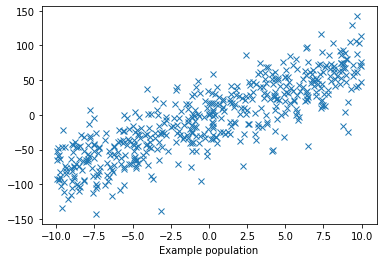

In [110]:
#Number of data points
n = 500
X = np.random.uniform(-10,10, n) 
noise = np.random.normal(0, 30, n) # Gaussian distribution

#This are the real parameters
true_beta1, true_beta0 = 7.6, -3.3

#Our true function
# y = beta1 * x + beta0 + ε
y = true_beta1 * X + true_beta0 + noise

pop = np.array([X, y])

plt.plot(X, y, 'x');
plt.xlabel('Example population')
plt.show()

To compute the standard error assosiated to the coefitients $\beta_0$ and $\beta_1$ we have the following formulas:

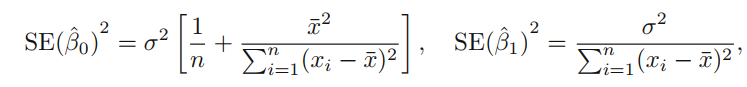

Where $\sigma^2$ = Var($\epsilon$). However, in a normal problem we don't have acces to $\epsilon$, so we have to calculate using the residual error using the next formlas:

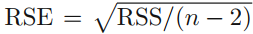 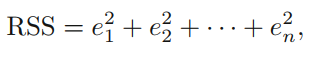 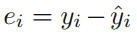

Let's use our generated data, then take N samples K times and check if our RSE estmiate is near to Var($\epsilon$)

#### Plot test data

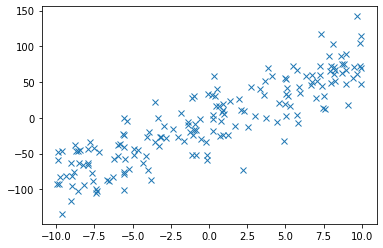

In [111]:
#divide train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,test_size=0.35)

trainSampleSize = y_train.size

plt.plot(X_test, y_test, 'x');

#### Use sklearn to train model using training data

In [123]:
#use scikit learn to calculate the coefficients
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

beta0 = linr.intercept_
beta1 = linr.coef_[0]

print(beta0, beta1)

[-6.02300724] [7.50890636]


Original coefficients are w = 7.3  and b = -3.3. Now lets calculate RSE using above formula. Remember our sample number n is (500 * 0.65) = 325

#### Plot traning data with function obtained from train data

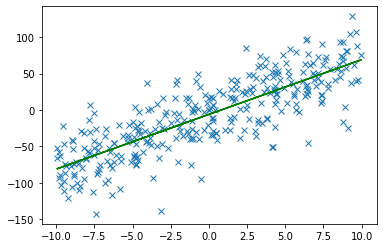

In [124]:
yplot = X_train * beta1 + beta0

plt.plot(X_train, y_train, 'x');
plt.plot(X_train, yplot, 'g')
plt.show()

Line is just in the middle of data. This means that our error has zero mean as shown below.

#### Analyzing error (noise) that was added during creation of data

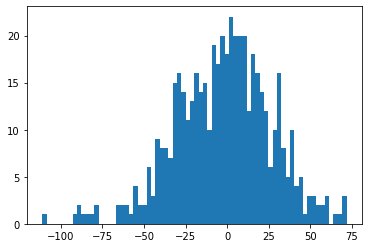

In [125]:
#Plot error distribution
plt.hist(noise, bins=70)
plt.show()

As expected error (noise) has a normal distribution.

In [126]:
#Error mean
np.mean(noise)

-2.3663252473430885

Since error has a normal distribution, is expected to have a near zero mean.

In [127]:
#Error standard deviation
np.std(noise)

28.929465525598413

In [128]:
#Error vriance
np.var(noise)

836.913975596787

#### Calculate residual sum of squares and residual standard error

In [129]:
#First evaluate the model with calculated coeficients, using the sample data.
yHat = X_train * beta1 + beta0

#Calculate error using our calculated Y and comparing with true Y
error = y_train - yHat

#Calculate RSS
rss = np.square(error)
rss = np.sum(rss)

#Now calculate RSE
rse = math.sqrt(rss / (testSampleSize-2))

print(f'RSS: {rss}, RSE: {rse}')

RSS: 291300.8139676637, RSE: 30.030985750771578


#### Why Var(error) is approximately equal to RSE?

To answer this question, first lets plot error calculated above.

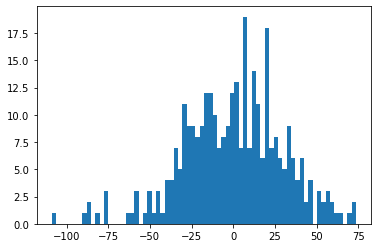

In [130]:
plt.hist(error, bins=70)
plt.show()

As we can see, we got a very similar error distribution than our error(noise) introduced at the begigning.
Having this aproximation we can calculate RSE, which is a very similar equation than varaince.
In the formula (n - 2), comes from the degrees of freedom. Since we have 2 parameters.

#### Calculate standard error for beta1

In [131]:
#Calculate standard error for beta_1
X_train_median = np.median(X_train)

x_sq_sum = X_train - X_train_median
x_sq_sum = np.square(x_sq_sum)
x_sq_sum = np.sum(x_sq_sum)

beta1_SE = (rse ** 2) / x_sq_sum
beta1_SE = math.sqrt(beta1_SE)
beta1_SE

0.2925811628457798

#### Calculate standard error for beta0

In [132]:
#Calculate standard error for beta_0
beta0_SE = (X_train_median ** 2) / x_sq_sum
beta0_SE = (rse ** 2) * ((1 / trainSampleSize) + beta0_SE)
beta0_SE = math.sqrt(beta0_SE)
beta0_SE

1.665826171267432

In [133]:
print(f'Real coeficients are beta0: {true_beta0} and beta1: {true_beta1}')
print(f'Calculated coeficients using sample data are beta0: {beta0} and beta1: {beta1}')
print(f'For beta1, there is a 95% confidence that value is between: {beta1 - (2 * beta1_SE)} and {beta1 + (2 * beta1_SE)}')
print(f'For beta0, there is a 95% confidence that value is between: {beta0 - (2 * beta0_SE)} and {beta0 + (2 * beta0_SE)}')

Real coeficients are beta0: -3.3 and beta1: 7.6
Calculated coeficients using sample data are beta0: [-6.02300724] and beta1: [7.50890636]
For beta1, there is a 95% confidence that value is between: [6.92374404] and [8.09406869]
For beta0, there is a 95% confidence that value is between: [-9.35465958] and [-2.6913549]


Calculations for above intervals relies on the assumption that error has a gausian distribution.
This means that the error noise included in the measurment has a gausian disribution.

#### Describe an intuition why calculating standard errors are useful, what do they indicate?

Taking the example avobe, we have a true b0 = -3.3 and a b1 = 7.6, these are the real coeficients that describe our function. Then we take randomly n samples (x, y) from the population, then we calculate again our bhat0 and bhat1. We keep taking n random samples form this population, and then calculating the coeficients again. If we plot the distribution from the coeficients caculated in the samplings, we will have a normal distribution in which the mean is exactly b0 or b1, and the standard deviation from these distribution = standard error. This value is lower the more samples we take.

This useful to calculate confidence intervals.
Also is useful for hypotesis testing, for example to check whether to reject H0 -> b0 = 0 or b1 = 0.

### 3.1.3 Assessing the accuaracy of the Model

#### Calculate Residual standard error

RSE is considered a measure of the lack of fit of the model to the data.

We have already calculated RSE previously, it was used to calculate coefficients standard error.
The value calculated was:

In [134]:
print(f'RSE: {rse}')

RSE: 30.030985750771578


Before giving more intuition, lets plot again the original noise distribution:

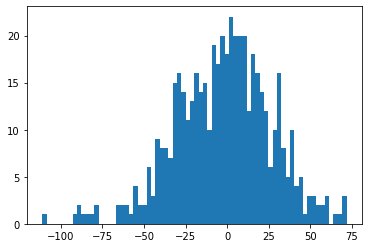

In [135]:
plt.hist(noise, bins=70)
plt.show()

Usually we dont have access to the original noise distribution, but with calculated RSE, we can say that the population noise standard deviation = RSE

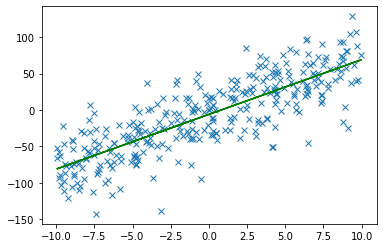

In [136]:
yplot = X_train * beta1 + beta0

plt.plot(X_train, y_train, 'x');
plt.plot(X_train, yplot, 'g')
plt.show()

We can se in the plot above, that even if we know the real coefficients b0 and b1, due to the noise we might be off at leas on average the value of RSE.

How to interpretate this value? it depends on the problem context, and what does y units represents.

#### Calculate $R^2$ Statistic

RSE provides an absolute measure of lack of fit of the model to the data, but it is measured in units of Y is not always clear what constitutes a good RSE. The $R^2$ statistic provides a value from 0 to 1. A value close to 0 might occur because the linear model is wrong or the inherent error (noise) is high, or both.

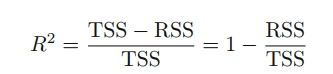

In [137]:
y_train_mean = np.mean(y_train)
tss = y_train - y_train_mean
tss = np.square(tss)
tss = np.sum(tss)
rsq =  1 - (rss/tss)
print(f'RSQ: {rsq}')

RSQ: 0.6707607978060182


#### Next steps

For beta0, conficence intervals seems to be hight, is it correct?
- Use data from book and try to reproduce their values
- What are degrees of freedom?